In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

# Load Data

In [43]:
X_train = pd.read_pickle('./datasets/heart_disease/X_train.pkl')
y_train = pd.read_pickle('./datasets/heart_disease/y_train.pkl')
X_test = pd.read_pickle('./datasets/heart_disease/X_test.pkl')
y_test = pd.read_pickle('./datasets/heart_disease/y_test.pkl')

In [44]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
279,54,0,0,130,253,0,1,155,0,0.0,0
451,64,1,2,144,0,0,1,122,1,1.0,1
39,48,0,2,150,227,0,0,130,1,1.0,1
557,56,1,1,137,208,1,1,122,1,1.8,1
548,66,1,2,112,261,0,0,140,0,1.5,0


# Train Boosting

### Baseline

Validation Accuracy: 0.898
Test Accuracy: 0.835
F1 Score: 0.864


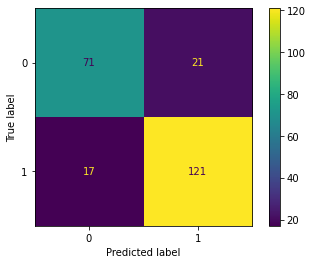

In [15]:
# Baseline model
clf = AdaBoostClassifier(random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Print accuracy
print(f'Validation Accuracy: {clf.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {clf.score(X_test, y_test):.3f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.3f}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()

# Grid search

Fitting 5 folds for each of 167 candidates, totalling 835 fits
Runtime:139.98499131202698
Best Score: 0.878
Best Parameters
{'n_estimators': 730}
Validation Accuracy: 1.000
Test Accuracy: 0.894
F1 Score: 0.894


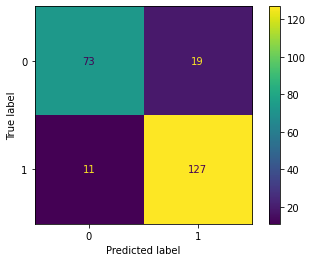

In [54]:
parameters = {
    'n_estimators': [i for i in range(10, 5001, 30)],
    #'learning_rate': [i/100 for i in range(0, 201, 10)],
}

ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='log_loss', 
                                                          max_depth=7), 
                         random_state=0)

start_time = time.time()

clf = GridSearchCV(estimator=ada, 
                   param_grid=parameters, 
                   scoring='f1',
                   verbose=1,
                   n_jobs=-1).fit(X_train, y_train)

df = pd.DataFrame(clf.cv_results_)
df.tail()
df.to_csv('./results/hd/results_hd_boosting.csv', index=False)

print(f'Runtime:{time.time() - start_time}')
print(f'Best Score: {clf.best_score_:.3f}')
print('Best Parameters')
print(clf.best_params_)

y_pred = clf.predict(X_test)

# Print accuracy
print(f'Validation Accuracy: {clf.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {clf.score(X_test, y_test):.3f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.3f}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()

# Final graphs

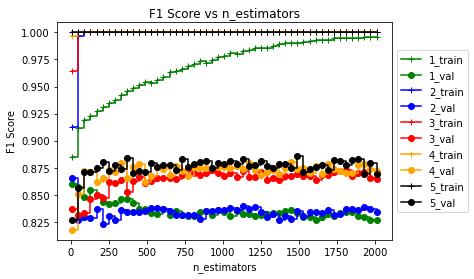

In [47]:
# Max Depth
d1_train = []
d1_val = []

d2_train = []
d2_val = []

d3_train = []
d3_val = []

d4_train = []
d4_val = []

d5_train = []
d5_val = []

depths = [[d1_train, d1_val],
          [d2_train, d2_val],
          [d3_train, d3_val],
          [d4_train, d4_val],
          [d5_train, d5_val],]

n_estim = [i for i in range(10, 2011, 40)]

d = 0
for depth in depths:
    d += 1
    train, val = depth
    for n_est in n_estim:
        scores = cross_validate(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='log_loss', 
                                                                                              max_depth=d, 
                                                                                              random_state=0),
                                                             n_estimators=n_est),
                                X=X_train, 
                                y=y_train,
                                scoring='f1',
                                return_train_score=True,
                                return_estimator=True,
                                n_jobs=-1)

        # Append scores
        train.append(scores['train_score'].mean())
        val.append(scores['test_score'].mean())

# Plot Scores
fig, ax = plt.subplots()
ax.set_xlabel('n_estimators')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score vs n_estimators')
#ax.set_ylim([0.2, 1.0])

ax.plot(n_estim, d1_train, marker="+", label="1_train", c='green', drawstyle="steps-post")
ax.plot(n_estim, d1_val, marker="o", label="1_val", c='green', drawstyle="steps-post")

ax.plot(n_estim, d2_train, marker="+", label="2_train", c='blue', drawstyle="steps-post")
ax.plot(n_estim, d2_val, marker="o", label="2_val", c='blue', drawstyle="steps-post")

ax.plot(n_estim, d3_train, marker="+", label="3_train", c='red', drawstyle="steps-post")
ax.plot(n_estim, d3_val, marker="o", label="3_val", c='red', drawstyle="steps-post")

ax.plot(n_estim, d4_train, marker="+", label="4_train", c='orange', drawstyle="steps-post")
ax.plot(n_estim, d4_val, marker="o", label="4_val", c='orange', drawstyle="steps-post")

ax.plot(n_estim, d5_train, marker="+", label="5_train", c='black', drawstyle="steps-post")
ax.plot(n_estim, d5_val, marker="o", label="5_val", c='black', drawstyle="steps-post")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


### Pre-Pruning: Max Depth

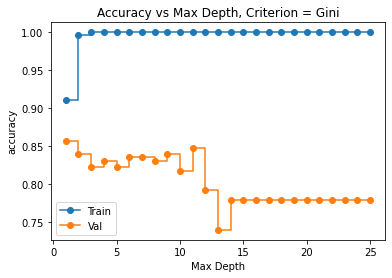

Best Accuracy: 0.857
Best Depth: 1


In [6]:
# Max Depth
max_d = 26

train_acc = []
val_acc = []

for i in range(1, max_d):
    clf = AdaBoostClassifier(random_state=0,
                             estimator=DecisionTreeClassifier(max_depth=i)).fit(X_train, y_train)

    # Append scores
    train_acc.append(clf.score(X_train, y_train))
    val_acc.append(clf.score(X_val, y_val))

# Plot Scores
fig, ax = plt.subplots()
ax.set_xlabel("Max Depth")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Max Depth, Criterion = Gini")
ax.plot(list(range(1,max_d)), train_acc, marker="o", label="Train", drawstyle="steps-post")
ax.plot(list(range(1,max_d)), val_acc, marker="o", label="Val", drawstyle="steps-post")
ax.legend()
plt.show()

best_depth = np.argmax(val_acc) + 1

# Print best scores
print(f'Best Accuracy: {max(val_acc):.3f}')
print(f'Best Depth: {best_depth}')

### Criterion

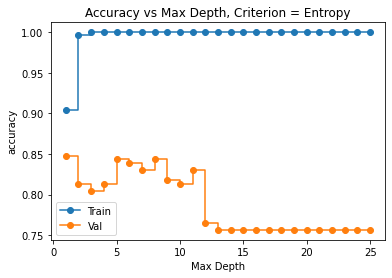

Best Accuracy: 0.848
Best Depth: 1



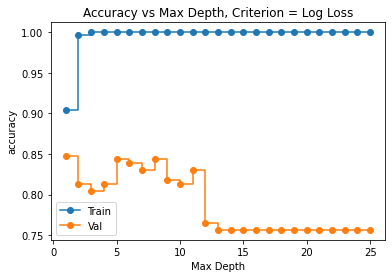

Best Accuracy: 0.848
Best Depth: 1



In [7]:
max_d = 26

# Entropy
train_acc = []
val_acc = []

for i in range(1, max_d):
    clf = AdaBoostClassifier(random_state=0,
                             estimator=DecisionTreeClassifier(criterion='entropy',
                                                              max_depth=i)).fit(X_train, y_train)

    # Append scores
    train_acc.append(clf.score(X_train, y_train))
    val_acc.append(clf.score(X_val, y_val))
    
# Plot scores
fig, ax = plt.subplots()
ax.set_xlabel("Max Depth")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Max Depth, Criterion = Entropy")
ax.plot(list(range(1,max_d)), train_acc, marker="o", label="Train", drawstyle="steps-post")
ax.plot(list(range(1,max_d)), val_acc, marker="o", label="Val", drawstyle="steps-post")
ax.legend()
plt.show()

# Print Best Score
print(f'Best Accuracy: {max(val_acc):.3f}')
print(f'Best Depth: {np.argmax(val_acc) + 1}')
print()

# Log Loss
train_acc = []
val_acc = []

for i in range(1, max_d):
    clf = AdaBoostClassifier(random_state=0,
                             estimator=DecisionTreeClassifier(criterion='log_loss',
                                                              max_depth=i)).fit(X_train, y_train)

    # Append scores
    train_acc.append(clf.score(X_train, y_train))
    val_acc.append(clf.score(X_val, y_val))

# Plot scores
fig, ax = plt.subplots()
ax.set_xlabel("Max Depth")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Max Depth, Criterion = Log Loss")
ax.plot(list(range(1,max_d)), train_acc, marker="o", label="Train", drawstyle="steps-post")
ax.plot(list(range(1,max_d)), val_acc, marker="o", label="Val", drawstyle="steps-post")
ax.legend()
plt.show()

# Print Best Score
print(f'Best Accuracy: {max(val_acc):.3f}')
print(f'Best Depth: {np.argmax(val_acc) + 1}')
print()

### Post-Pruning: Minimal Cost-Complexity

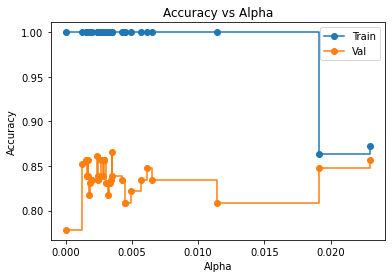

Best Minimal Cost Complexity Accuracy: 0.865
Best Alpha: 0.00349



In [8]:
clf = DecisionTreeClassifier(random_state=0)

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Remove the last data point which is very far from the other alphas and doesn't plot nicely
ccp_alphas = ccp_alphas[:-1]
impurities = impurities[:-1]

# Fit
clfs = []
for ccp_alpha in ccp_alphas:
    clf = AdaBoostClassifier(random_state=0,
                             estimator=DecisionTreeClassifier(ccp_alpha=ccp_alpha)).fit(X_train, y_train)
    clfs.append(clf)

# Append train and val scores
train_scores = [clf.score(X_train, y_train) for clf in clfs]
val_scores = [clf.score(X_val, y_val) for clf in clfs]

# Plot
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha")
ax.plot(ccp_alphas, train_scores, marker="o", label="Train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="Val", drawstyle="steps-post")
ax.legend()
plt.show()

best_alpha = ccp_alphas[np.argmax(val_scores)]

print(f'Best Minimal Cost Complexity Accuracy: {max(val_scores):.3f}')
print(f'Best Alpha: {best_alpha:.5f}')
print()    

### Learning rate

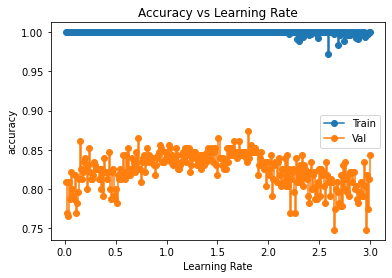

Best Accuracy: 0.874
Best Learning Rate: 1.8


In [9]:
# Max Depth
learning_rates = [i / 100 for i in range(1, 301)]

train_acc = []
val_acc = []

for i in learning_rates:
    clf = AdaBoostClassifier(learning_rate=i, 
                             random_state=0, 
                             estimator=DecisionTreeClassifier(max_depth=9)).fit(X_train, y_train)
    
    # Append scores
    train_acc.append(clf.score(X_train, y_train))
    val_acc.append(clf.score(X_val, y_val))

# Plot Scores
fig, ax = plt.subplots()
ax.set_xlabel("Learning Rate")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Learning Rate")
ax.plot(learning_rates, train_acc, marker="o", label="Train", drawstyle="steps-post")
ax.plot(learning_rates, val_acc, marker="o", label="Val", drawstyle="steps-post")
ax.legend()
plt.show()

best_learning_rate_pre = learning_rates[np.argmax(val_acc)]

# Print best scores
print(f'Best Accuracy: {max(val_acc):.3f}')
print(f'Best Learning Rate: {best_learning_rate_pre}')

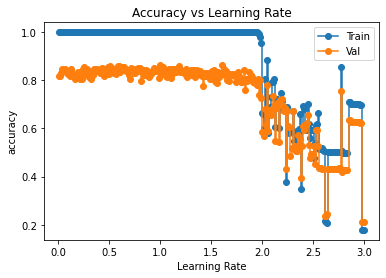

Best Accuracy: 0.865
Best Learning Rate: 1.0


In [10]:
# Max Depth
learning_rates = [i / 100 for i in range(1, 301)]

train_acc = []
val_acc = []

for i in learning_rates:
    clf = AdaBoostClassifier(learning_rate=i, 
                             random_state=0, 
                             estimator=DecisionTreeClassifier(ccp_alpha=best_alpha)).fit(X_train, y_train)
    
    # Append scores
    train_acc.append(clf.score(X_train, y_train))
    val_acc.append(clf.score(X_val, y_val))

# Plot Scores
fig, ax = plt.subplots()
ax.set_xlabel("Learning Rate")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Learning Rate")
ax.plot(learning_rates, train_acc, marker="o", label="Train", drawstyle="steps-post")
ax.plot(learning_rates, val_acc, marker="o", label="Val", drawstyle="steps-post")
ax.legend()
plt.show()

best_learning_rate_post = learning_rates[np.argmax(val_acc)]

# Print best scores
print(f'Best Accuracy: {max(val_acc):.3f}')
print(f'Best Learning Rate: {best_learning_rate_post}')